<a href="https://colab.research.google.com/github/ali-workshop/-BANK-SYS-NicePolymorphism-DependencyInjection-Factorypattern-StrategyPattern/blob/main/Energy_Efficient_Routing_and_Communication_Protocols_for_IoT_Networks_in_Smart_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download the necessary libraries

In [ ]:
!pip install networkx

#import the important libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

#read the data set using pandas

In [ ]:
data_path="/content/data.csv"
data = pd.read_csv(data_path)

#explore the data set

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7199 entries, 0 to 7198
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7199 non-null   int64  
 1   0.1     7199 non-null   int64  
 2   0.2     7199 non-null   int64  
 3   7       7199 non-null   int64  
 4   65      7199 non-null   int64  
 5   7.1     7199 non-null   int64  
 6   71      7199 non-null   int64  
 7   9       7199 non-null   int64  
 8   6       7199 non-null   int64  
 9   11      7199 non-null   int64  
 10  6.1     7199 non-null   int64  
 11  23      7199 non-null   int64  
 12  95      7199 non-null   int64  
 13  5       7199 non-null   int64  
 14  11.1    7199 non-null   int64  
 15  1.2     7199 non-null   float64
 16  5.1     7199 non-null   int64  
 17  1       7199 non-null   int64  
 18  0.3     7199 non-null   int64  
 19  0.4     7199 non-null   int64  
 20  0.5     7199 non-null   int64  
 21  0.6     7199 non-null   int64  
 22  

In [ ]:
data.describe()

,0,0.1,0.2,7,65,7.1,71,9,6,11,...,0.16,0.17,0.18,0.19,0.20,65.1,0.21,0.22,208,-1
count,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,...,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000
mean,1179.663842,11.501597,29.504098,2.135991,202.735936,8.453118,748.881095,72.141686,6.027782,13.387276,...,0.104737,0.100986,0.106543,0.093068,0.057925,198.538408,0.251424,5.805806,251.827198,-0.933324
std,692.391869,6.921821,17.317017,2.702377,737.913875,2.673383,3630.482189,406.533328,0.814945,4.512005,...,0.306235,0.301331,0.308552,0.290549,0.233617,725.231555,1.176842,22.227525,43.219695,0.359060
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,15.000000,0.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,190.000000,-1.000000
25%,600.000000,6.000000,15.000000,0.000000,57.000000,7.000000,106.000000,16.000000,6.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,230.000000,-1.000000
50%,1200.000000,12.000000,30.000000,1.000000,77.000000,8.000000,162.000000,29.000000,6.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,2.000000,243.000000,-1.000000
75%,1779.500000,17.500000,44.500000,3.000000,112.000000,10.000000,287.000000,48.000000,6.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,109.000000,0.000000,5.000000,264.000000,-1.000000
max,2359.000000,23.000000,59.000000,21.000000,15607.000000,37.000000,84500.000000,13591.000000,11.000000,42.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,14918.000000,25.000000,936.000000,1736.000000,1.000000


In [ ]:
data.columns

Index(['0', '0.1', '0.2', '7', '65', '7.1', '71', '9', '6', '11', '6.1', '23',
       '95', '5', '11.1', '1.2', '5.1', '1', '0.3', '0.4', '0.5', '0.6', '0.7',
       '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '1.1',
       '0.16', '0.17', '0.18', '0.19', '0.20', '65.1', '0.21', '0.22', '208',
       '-1'],
      dtype='object')

#rename the columns

In [ ]:
import pandas as pd

def rename_columns(data):
    # Create a dictionary to map the old column names to the new names
    column_mapping1 = {
        '0': 'time_H_M',
        '0.1': 'time_H',
        '0.2': 'time_M',
        '7': 'time_S',
    }

    data.rename(columns=column_mapping1, inplace=True)

    # Get the original column names from 4 to 41
    original_columns = data.columns[4:42]

    # Generate new column names
    new_columns = [f'feature_{i+1}' for i in range(37)]

    # Create a dictionary to map old column names to new names
    column_mapping2 = dict(zip(original_columns, new_columns))

    # Rename the columns
    data.rename(columns=column_mapping2, inplace=True)

    # Create a dictionary to map the old column name '-1' to 'target'
    column_mapping3 = {
        '-1': 'target',
    }

    # Use the rename method to rename the columns
    data.rename(columns=column_mapping3, inplace=True)

#call the function to rename the columns

In [ ]:
rename_columns(data)

#check for the new column's names

In [ ]:
data.columns

Index(['time_H_M', 'time_H', 'time_M', 'time_S', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'target'],
      dtype='object')

#start preprocessing the data

* replace the value -1 with value 0 in the target column
* Solve the problem of imbalance between the labels
* Scaling and normalization on the data
* define the Features and the Target
* split the data into train and test


In [ ]:
data['target'] = data['target'].replace(-1, 0)

In [ ]:
# The data label is unbalanced
data["target"].value_counts()

0    6959
1     240
Name: target, dtype: int64

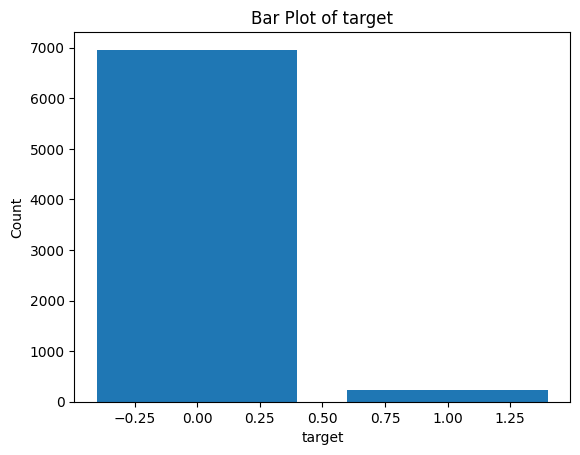

In [ ]:

# Count the occurrences of each unique value in the 'Category' column
value_counts = data['target'].value_counts()

# Plot the bar chart
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Bar Plot of target')

# Show the plot
plt.show()

In [ ]:
#solve the problem with SMOTE
lab=data["target"]
smote = SMOTE(sampling_strategy={1: 7000, 0: 7000}, random_state=42)
data, lab = smote.fit_resample(data, lab)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (7000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 6959)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (7000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 6959)
  warnings.warn(


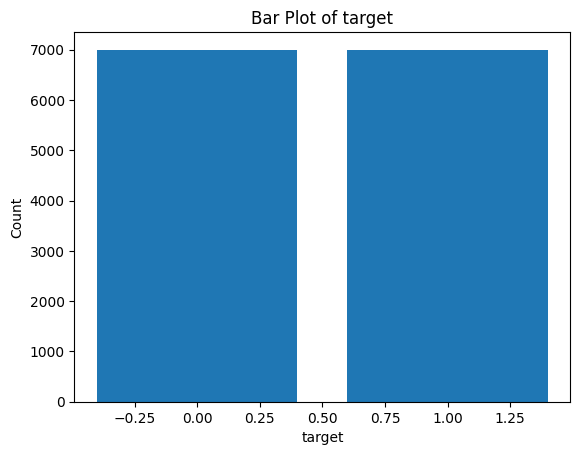

In [ ]:
#verify that the imbalance problem is solved

# Count the occurrences of each unique value in the 'Category' column
value_counts = data['target'].value_counts()

# Plot the bar chart
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Bar Plot of target')

# Show the plot
plt.show()

# Extract features and target variables

In [ ]:
X = data.iloc[:, 4:41]  # Features (columns 4 to 40)
y = data['target']   # Target (column 41)


# Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale and normalize the features using Min-Max scaling

In [ ]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Fit and evaluate machine learning models

#support vectors machine (SVM)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)
# Calculate precision, recall, and F1-score for SVM model
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)


SVM Accuracy: 0.96
SVM Precision: 0.9657933042212519
SVM Recall: 0.9581227436823104
SVM F1 Score: 0.9619427328742298


# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_accuracy = dt_model.score(X_test, y_test)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)
# Calculate precision, recall, and F1-score for DT model
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
print("\nDecision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)

Decision Tree Accuracy: 0.98

Decision Tree Precision: 0.9700854700854701
Decision Tree Recall: 0.9833935018050541
Decision Tree F1 Score: 0.9766941556113303




# Random Forest


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
# Calculate precision, recall, and F1-score for RF model
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
print("\nRandom Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

Random Forest Accuracy: 0.99

Random Forest Precision: 0.9963636363636363
Random Forest Recall: 0.9891696750902527
Random Forest F1 Score: 0.9927536231884057



# XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_accuracy = xgb_model.score(X_test, y_test)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
# Make predictions on the test set
xgboost_predictions = xgb_model.predict(X_test)
# Calculate precision, recall, and F1-score for XGboost model
xgboost_precision = precision_score(y_test, xgboost_predictions)
xgboost_recall = recall_score(y_test, xgboost_predictions)
xgboost_f1 = f1_score(y_test, xgboost_predictions)
print("\nXGBoost Precision:", xgboost_precision)
print("XGBoost Recall:", xgboost_recall)
print("XGBoost F1 Score:", xgboost_f1)

XGBoost Accuracy: 0.99

XGBoost Precision: 0.9928005759539237
XGBoost Recall: 0.9956678700361011
XGBoost F1 Score: 0.9942321557317952


#make predictions to detect the normal and anomalous nodes

In [ ]:
# Select the first 30 rows from X_test
subset_X_test = X_test[:30]
# Make predictions on the subset_X_test using random forest
rf_predictions = rf_model.predict(subset_X_test)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a NetworkX graph
G = nx.Graph()

# Define the dimensions of the grid
num_rows = 5
num_cols = 6

# Create nodes in a grid pattern
for row in range(num_rows):
    for col in range(num_cols):
        node_name = f"node_{row}_{col}"
        G.add_node(node_name, pos=(col, -row))


# Add anomalous and normal nodes based on predictions
for i, prediction in enumerate(rf_predictions):
    node_name = f"node_{i // num_cols}_{i % num_cols}"
    G.nodes[node_name]['anomalous'] = prediction == 0



# Create layout for the grid

In [ ]:

pos = {node: (col, -row) for node, (col, row) in nx.get_node_attributes(G, 'pos').items()}

# Add edges to connect adjacent nodes in the grid
for row in range(num_rows):
    for col in range(num_cols):
        current_node_name = f"node_{row}_{col}"
        if row > 0:
            neighbor_node_name = f"node_{row - 1}_{col}"
            G.add_edge(current_node_name, neighbor_node_name)
        if col > 0:
            neighbor_node_name = f"node_{row}_{col - 1}"
            G.add_edge(current_node_name, neighbor_node_name)



# Separate anomalous and normal nodes

In [ ]:

anomalous_nodes = [node for node, data in G.nodes(data=True) if data.get('anomalous')]
normal_nodes = [node for node in G.nodes() if node not in anomalous_nodes]



# Draw the graph

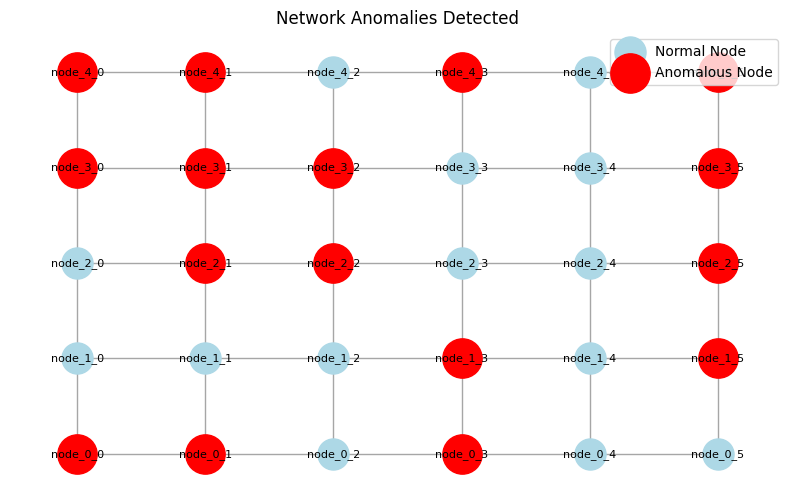

In [ ]:

plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, nodelist=normal_nodes, node_color='lightblue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=anomalous_nodes, node_color='red', node_size=800)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Network Anomalies Detected")
plt.legend(["Normal Node", "Anomalous Node"])
plt.axis('off')  # Turn off the axis

# Display the graph
plt.show()


#for real time presentation as Smart cities scenario

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a NetworkX graph
G = nx.Graph()

# Add nodes and edges to represent your network in a grid pattern
num_rows = 6
num_cols = 5

for row in range(num_rows):
    for col in range(num_cols):
        node_name = f"router_{row}_{col}"
        G.add_node(node_name)
        if row > 0:
            G.add_edge(node_name, f"router_{row-1}_{col}")
        if col > 0:
            G.add_edge(node_name, f"router_{row}_{col-1}")



# Define random anomalous nodes for just presentation

In [ ]:
anomalous_nodes = ["router_2_2", "router_2_3", "router_3_3", "router_4_2", "router_4_3", "router_1_1", "router_0_0", "router_5_4"]

# Ensure that all anomalous nodes are added to the graph
for node in anomalous_nodes:
    if not G.has_node(node):
        G.add_node(node)

# Create a layout for the graph
pos = nx.kamada_kawai_layout(G)

# Create a list of frames to animate anomalous nodes
frames = []
num_frames = min(10, len(anomalous_nodes))
for i in range(num_frames):
    frame = []
    for j in range(i + 1):
        frame.append(anomalous_nodes[j])
    frames.append(frame)




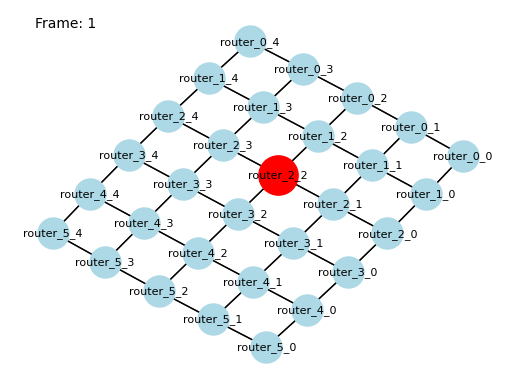

In [ ]:
# Create an initial plot
fig, ax = plt.subplots()
plt.title("Network Anomalies Detected")
# Function to update the graph for each frame of the animation
def update(frame):
    ax.clear()

    # Draw normal nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1, alpha=0.7, ax=ax)

    # Highlight anomalous nodes for this frame
    nx.draw_networkx_nodes(G, pos, nodelist=frames[frame], node_color='red', node_size=800, ax=ax)

    # Add labels for the frame number
    ax.text(0.05, 0.95, f'Frame: {frame + 1}', transform=ax.transAxes)

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)
HTML(ani.to_html5_video())


In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/Energy-Efficient Routing and Communication Protocols for IoT Networks in Smart Cities.ipynb

[NbConvertApp] WARNING | pattern '/content/Energy-Efficient' matched no files
[NbConvertApp] WARNING | pattern 'Routing' matched no files
[NbConvertApp] WARNING | pattern 'and' matched no files
[NbConvertApp] WARNING | pattern 'Communication' matched no files
[NbConvertApp] WARNING | pattern 'Protocols' matched no files
[NbConvertApp] WARNING | pattern 'for' matched no files
[NbConvertApp] WARNING | pattern 'IoT' matched no files
[NbConvertApp] WARNING | pattern 'Networks' matched no files
[NbConvertApp] WARNING | pattern 'in' matched no files
[NbConvertApp] WARNING | pattern 'Smart' matched no files
[NbConvertApp] WARNING | pattern 'Cities.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--